In [3]:
import scipy.io
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [23]:
class BData():
    def __init__(self, skeleton_location, VGG_location):
        self.skeleton = np.array(
            scipy.io.loadmat(skeleton_location)["skeldata"])
        self.VGG = np.array(scipy.io.loadmat(VGG_location)["features"])

    def missing_data(self):
        #each column is a frame
        # index 0 is the frame number
        # Every 3 indexes are the x,y coordinates of the joints and the Pi probability of being present - we have 18 diferent joints
        # indexes 3x+1 are the x coordinates 
        # indexes 3x+2 are the y coordinates
        # indexes 3x+3 are the Pi probabilities

        #copy the data
        data = self.skeleton.copy()

        #randomly put 10% of the Pi probabilities to 0 for all frames
        for i in range(data.shape[1]):
            # range(3, data.shape[0], 3) works by taking the indexes 3,6,9,12,15,18,21,24,27,30,33,36,39,42,45,48,51 and 54 
            for j in range(3, data.shape[0], 3):
                if np.random.rand() < 0.1:
                    data[j, i] = 0
        print("Missing data")
        print(data)
        return data

    #recover missing data by implementing the grdient descent algorithm
    #def recover_data(self, missing_data_matrix):
        #copy the data
        #data = missing_data_matrix.copy()
        #apply the gradient descent algorithm with 100 iterations
        #for i in range(100):
            
    def EDA(self):
        # p = [f"p{i}" for i in range((self.skeleton[:, 0]).shape[0]-3)]

        # index = ["x", "y", "p"]*round((self.skeleton[:, 0].shape[0]-1)/3)
        index = [j+str(i+1) for j in ["x", "y", "p"]
                 for i in range(round((self.skeleton[:, 0].shape[0]-1)/3))]
        skeleton_df = pd.DataFrame(
            self.skeleton.transpose(), columns=["f", *index])

        ts = skeleton_df.plot.scatter(x='x1', y='y1')
        ts.plot()
        print("Skeleton EDA")
        plt.show()
        VGG_df = pd.DataFrame(self.VGG)
        VGG_df.info()

    def SVD(self, r=5):
        U, S, Vt = np.linalg.svd(self.skeleton, full_matrices=False)
        self.aprox = (U[:, :r] * S[:r]) @ Vt[:r, :]
        plt.scatter(self.aprox[0], self.aprox[1])
        print("SVD aproximation")
        plt.show()

    def Kmeans(self, k=5):
        from sklearn.cluster import KMeans
        kmeans = KMeans(n_clusters=k, random_state=0).fit(self.skeleton)
        print("Kmeans")
        print(kmeans.labels_)
        print(kmeans.cluster_centers_)
        #plot the data and the clusters
        plt.scatter(self.skeleton[:, 0], self.skeleton[:, 1], c=kmeans.labels_, cmap='rainbow')
        plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='black')
        
        


/home/boas/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Kmeans
[1 2 0 3 2 0 3 2 0 3 2 0 3 2 0 3 2 0 3 2 0 3 2 0 3 2 0 3 2 0 3 2 0 3 2 0 3
 2 0 3 2 0 3 2 0 3 2 0 3 2 0 3 2 0 3]
[[4.40227676e-01 4.98440094e-01 4.22668082e-01 ... 3.82914024e-01
  3.07627498e-01 4.56788417e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.04770000e+04
  1.04780000e+04 1.04800000e+04]
 [5.35218040e-01 6.69379372e-01 1.39580185e-01 ... 4.32781565e-01
  4.29897771e-01 5.29223112e-01]
 [4.65244518e-01 4.03892121e-01 4.33659806e-01 ... 2.50993066e-01
  1.95282576e-01 2.38377368e-01]]


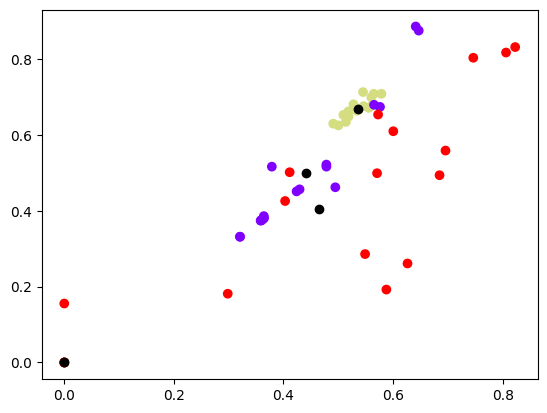

In [24]:
def main():
    data = BData("Data/girosmallveryslow2_openpose_complete.mat",
                 "Data/girosmallveryslow2_vggfeatures.mat")
    #data.EDA()
    #data.SVD()
    data.Kmeans(4)
    #missing_data=data.missing_data()
    #recover_data= data.recover_data(missing_data)

if __name__ == '__main__':
    main()